In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [4]:
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols =["time",'wind_gust_o'],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
station["wind_gust_o"].value_counts(normalize=True).map(lambda n: '{:.1%}'.format(n))

M                     95.7%
12.346656              0.4%
11.317768000000001     0.4%
10.803324              0.4%
11.832212              0.3%
12.8611                0.3%
10.28888               0.3%
13.375544              0.3%
13.889988              0.2%
9.774436               0.2%
14.404432              0.2%
14.918876000000001     0.1%
9.259992               0.1%
15.43332               0.1%
8.745548               0.1%
15.947764000000001     0.1%
16.462208              0.1%
16.976652              0.1%
8.231104               0.1%
17.491096              0.1%
7.71666                0.1%
18.00554               0.0%
7.202216               0.0%
6.687772               0.0%
18.519984              0.0%
19.034428000000002     0.0%
20.063316              0.0%
20.57776               0.0%
19.548872              0.0%
21.092204              0.0%
22.635536000000002     0.0%
22.121092              0.0%
21.606648              0.0%
23.14998               0.0%
6.173328               0.0%
24.693312           

In [5]:
#label gust/no gust

station["wind_gust_l"] = "Gust"
mask = station['wind_gust_o'].str.contains("M")
station.loc[mask,["wind_gust_l"]] = "No Gust"

print(station.sample(100))
print("*****************************")
station["wind_gust_l"].value_counts(normalize=True).map(lambda n: '{:.1%}'.format(n))

                    wind_gust_o wind_gust_l
time                                       
2020-10-05 01:30:00           M     No Gust
2019-05-07 06:30:00           M     No Gust
2020-01-20 05:30:00           M     No Gust
2020-05-16 02:30:00           M     No Gust
2019-03-01 19:30:00           M     No Gust
2018-12-14 08:30:00           M     No Gust
2020-09-11 20:30:00           M     No Gust
2019-03-14 22:30:00           M     No Gust
2020-03-22 08:30:00           M     No Gust
2020-12-23 22:30:00           M     No Gust
2019-11-13 15:00:00           M     No Gust
2019-01-22 04:00:00           M     No Gust
2018-11-10 07:30:00           M     No Gust
2019-02-27 04:00:00           M     No Gust
2019-05-16 02:30:00           M     No Gust
2019-08-13 15:30:00           M     No Gust
2019-11-13 18:00:00           M     No Gust
2019-09-09 22:30:00           M     No Gust
2019-03-21 03:00:00           M     No Gust
2020-02-18 03:30:00           M     No Gust
2019-09-10 20:00:00           M 

No Gust    95.7%
Gust        4.3%
Name: wind_gust_l, dtype: object

**Forecast D1**

In [6]:
#forecast d1
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD1.csv",parse_dates=["time"]).set_index("time")

model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,0,325.189301,0.0,1740.084961,1.217145,2.264327,103401.195312,280.789246,0.781950,24135.000000,...,0.000000,0.000000e+00,0.142531,0.000000,0.0,0.142531,5735.675293,1613.937378,253.634506,281.908569
2019-01-02 01:00:00,1,333.670044,0.0,1731.173340,1.369249,2.540694,103382.539062,280.565735,0.778615,24135.000000,...,0.000000,0.000000e+00,0.112280,0.000000,0.0,0.112280,5732.622559,1611.490601,253.512878,281.793762
2019-01-02 02:00:00,2,351.552429,0.0,1721.331055,1.275996,2.367275,103355.875000,280.324890,0.790180,24135.000000,...,0.000000,-8.593750e-07,0.061034,0.000000,0.0,0.061034,5730.169434,1609.190552,253.402405,281.787689
2019-01-02 03:00:00,3,33.307388,0.0,1717.657593,0.696653,1.317065,103329.765625,280.101318,0.786697,24135.000000,...,0.000000,0.000000e+00,0.065096,0.000000,0.0,0.065096,5728.023926,1606.675903,253.443604,281.926819
2019-01-02 04:00:00,4,164.234100,0.0,1696.665771,0.224833,0.409460,103310.062500,279.779572,0.795685,24135.000000,...,0.000000,-2.343750e-09,0.085678,0.000000,0.0,0.085678,5725.899414,1604.329346,253.527298,281.808014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 19:00:00,17491,297.835388,0.0,766.453003,6.263795,12.470805,101635.929688,279.777435,0.867834,24042.130859,...,99.540001,-7.467773e+00,0.000000,0.000000,0.0,0.000000,5371.030273,1446.678223,240.972382,271.724701
2021-01-01 20:00:00,17492,305.522644,0.0,769.984497,5.884632,12.509005,101664.109375,279.636444,0.861618,24046.214844,...,37.480000,-6.560820e+00,0.000000,0.077832,0.0,0.077832,5373.912109,1448.029297,241.139252,271.784821
2021-01-01 21:00:00,17493,304.144806,0.0,787.868713,6.053614,12.777985,101677.812500,279.624115,0.851240,24053.814453,...,25.900000,-1.712590e+01,0.000000,0.097343,0.0,0.097343,5376.250977,1449.369507,241.217819,271.922638


In [7]:
#concat station model
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wind_gust_o","Unnamed: 0"]).dropna()
df_all1k.sample(25)

,wind_gust_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-04-01 14:00:00,No Gust,280.518707,0.0,1555.760498,3.639284,3.613208,101495.648438,291.694763,0.509533,24167.529297,...,39.619999,-4.178613e+01,0.100000,0.000000,0.000000,0.100000,5505.827148,1471.290039,250.371307,279.982361
2020-08-02 01:00:00,No Gust,16.490808,0.0,2936.599121,3.542344,4.975739,102212.453125,288.630676,0.859470,24054.785156,...,0.000000,4.335937e-05,0.018224,0.000000,0.000000,0.018224,5805.854492,1547.372314,266.356873,286.536438
2020-06-10 10:00:00,No Gust,14.847000,0.0,2314.712402,2.821954,2.646448,101748.492188,290.926514,0.572762,24135.000000,...,0.000000,7.031250e-05,0.120015,0.000000,0.068552,0.120015,5659.851074,1499.338989,260.899811,281.432068
2019-08-19 22:00:00,Gust,13.648466,0.0,2401.270996,6.185099,10.196409,102087.789062,288.964386,0.799853,24104.144531,...,0.000000,-6.250000e-05,0.000000,0.000000,0.000000,0.000000,5699.269043,1533.279297,258.180817,283.966827
2020-09-08 06:00:00,No Gust,94.245300,0.0,3156.939453,3.045353,7.489575,102259.507812,287.213928,0.674790,24135.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5840.113770,1559.529053,266.849487,288.331116
2020-08-11 23:00:00,No Gust,356.403625,0.0,2731.070312,3.741095,5.155609,101206.015625,291.847687,0.929464,24044.898438,...,902.063660,-9.476250e+01,0.000000,0.000000,0.000000,0.000000,5665.996582,1495.474854,258.220123,287.189636
2019-04-04 23:00:00,No Gust,167.375671,0.0,452.408783,2.905604,3.363277,99807.585938,279.740753,0.916324,24047.255859,...,134.080002,-4.210273e+00,0.000000,0.464646,0.000000,0.464646,5225.264160,1318.184326,244.289688,272.184937
2019-01-28 02:00:00,No Gust,291.664551,0.0,1127.229614,3.723387,8.324348,102570.640625,281.970612,0.980712,24232.966797,...,19.752001,4.843750e-04,0.000000,1.000000,1.000000,1.000000,5594.801758,1511.460205,255.220993,274.459747
2020-10-17 15:00:00,No Gust,167.377289,0.0,1984.873047,5.486117,7.286988,101591.039062,289.135864,0.791514,24121.816406,...,1.120000,-9.193867e+00,0.000000,0.000000,0.000000,0.000000,5583.006348,1472.593262,256.310425,279.859070


**Scatter plot significant meteorological variables and wind_gust_l**

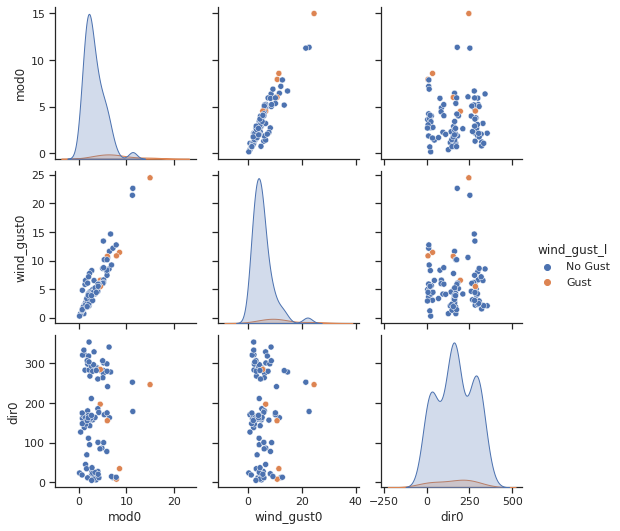

In [8]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["wind_gust_l","mod0","wind_gust0","dir0"]].sample(100), hue="wind_gust_l");

**Scatter plot 3 PCA variables and wind_gust_l**

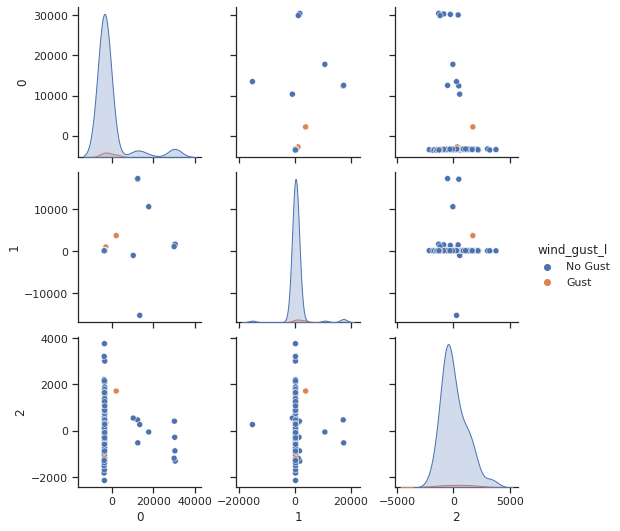

In [9]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["wind_gust_l"] = df_all1k.wind_gust_l
sns.pairplot(df_pca.sample(100), hue="wind_gust_l");

**Machine learning**

In [10]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [00:54<00:00,  1.86s/it]


In [11]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.84,0.77,None,0.88,0.11
GaussianNB,0.89,0.75,None,0.91,0.07
BernoulliNB,0.82,0.74,None,0.87,0.12
LinearDiscriminantAnalysis,0.96,0.70,None,0.96,0.24
QuadraticDiscriminantAnalysis,0.89,0.69,None,0.92,0.17
PassiveAggressiveClassifier,0.92,0.69,None,0.93,0.11
LabelSpreading,0.95,0.67,None,0.95,10.92
LabelPropagation,0.95,0.67,None,0.95,10.21
ExtraTreeClassifier,0.94,0.66,None,0.95,0.07


**ML LGBMClassifier**

In [12]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501'],
      dtype='object')


Confusion matrix  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           63       69   132
No Gust       117     3184  3301
All           180     3253  3433
Heidke Skill Score: 0.38

Quality report (Machine Learning)

              precision  recall  f1-score  support
Gust               0.35    0.48      0.40   132.00
No Gust            0.98    0.96      0.97  3301.00
accuracy           0.95    0.95      0.95     0.95
macro avg          0.66    0.72      0.69  3433.00
weighted avg       0.95    0.95      0.95  3433.00

Confusion matrix  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           72       73   145
No Gust       111     3177  3288
All           183     3250  3433
Heidke Skill Score: 0.41

Quality report (Machine Learning)

              precision  recall  f1-score  support
Gust               0.39    0.50      0.44   145.00
No Gust            0.98    0.97      0.97  3288.00
accuracy   

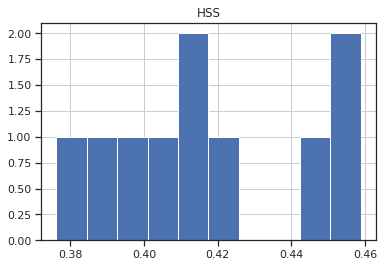

In [13]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS = []

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = NearestCentroid().fit(X_train,y_train)

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nstatistics HSS")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000

print(pd.DataFrame(HSS,columns=["HSS"]).describe())

sta, p = shapiro(HSS)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS,columns=["HSS"]).hist();

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [14]:
from scipy.stats import chi2_contingency

print("Last confusion matrix\n")
print(cm.iloc[0:2,0:2])

#statistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Statistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

Last confusion matrix

col_0        Gust  No Gust
wind_gust_l               
Gust           80       79
No Gust        94     3180

p-value: 3.7755684582206977e-154
Significance level: 0.01
Degres of of freedom:  1
Statistic 699.5342603542181
Reject H0,There is an association between machine learning forecast and observed values


**T test two independent samples. This is a test for the null hypothesis that two independent samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the forecast day0 sample is less than the HSS mean of the distribution underlying the forecast day1 sample. Significance level (alpha) = 0.01**

In [23]:
from scipy import stats

HHS_d0 = [0.421, 0.432, 0.42, 0.409, 0.417, 0.38, 0.437, 0.389, 0.406, 0.409]

HSS_d1 = HSS

alpha = 0.01
sta, p_value = stats.ttest_ind(HHS_d0, HSS_d1, alternative="less")

print("\nHSS day 0 forecast:", np.round(HHS_d0,3))
print("\nHSS day 1 forecast:", np.round(HSS_d1,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean machine learning day 0 = HSS mean machine learning day 1")
    print("\nwe are accepting alternative hypothesis: the HSS mean of day 0 sample is less than the HSS mean of day 1 sample")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean machine learning day 0 = HSS mean machine learning day 1")
     


HSS day 0 forecast: [0.421 0.432 0.42  0.409 0.417 0.38  0.437 0.389 0.406 0.409]

HSS day 1 forecast: [0.376 0.411 0.415 0.39  0.399 0.418 0.444 0.408 0.459 0.454]

alpha:  0.01

p_value point:  0.2997863202102886

we are accepting null hypothesis:  H0: HSS mean machine learning day 0 = HSS mean machine learning day 1


In [18]:
HHS_d0 = [0.421, 0.432, 0.42, 0.409, 0.417, 0.38, 0.437, 0.389, 0.406, 0.409]
HHS_d0

[0.421, 0.432, 0.42, 0.409, 0.417, 0.38, 0.437, 0.389, 0.406, 0.409]

**Add time features**

In [25]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.weekofyear

In [26]:

# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [00:50<00:00,  1.75s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.81,0.79,None,0.87,0.15
NearestCentroid,0.84,0.79,None,0.89,0.11
BernoulliNB,0.83,0.77,None,0.88,0.12
GaussianNB,0.86,0.77,None,0.90,0.07
Perceptron,0.93,0.75,None,0.94,0.10
PassiveAggressiveClassifier,0.88,0.75,None,0.91,0.10
LinearDiscriminantAnalysis,0.95,0.70,None,0.96,0.24
LabelPropagation,0.95,0.67,None,0.95,7.69
LabelSpreading,0.95,0.67,None,0.95,10.66


In [27]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'hour', 'month', 'dayofyear',
       'weekofyear'],
      dtype='object')


Confusion matrix  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           59       73   132
No Gust       110     3191  3301
All           169     3264  3433
Heidke Skill Score: 0.36

Quality report (Machine Learning)

              precision  recall  f1-score  support
Gust               0.35    0.45      0.39   132.00
No Gust            0.98    0.97      0.97  3301.00
accuracy           0.95    0.95      0.95     0.95
macro avg          0.66    0.71      0.68  3433.00
weighted avg       0.95    0.95      0.95  3433.00

Confusion matrix  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           73       72   145
No Gust       113     3175  3288
All           186     3247  3433
Heidke Skill Score: 0.41

Quality report (Machine Learning)

              precision  recall  f1-score  support
Gust               0.39    0.50      0.44   145.00
No Gust            0.98    0.97      0.97  3288.00
accuracy   

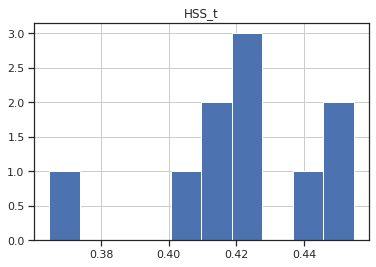

In [29]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_t = []

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  # machine learning
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confusion matrix

  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_t.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_t[t],2))

  #quality report

  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nStatistics HSS_t")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000

print(pd.DataFrame(HSS_t,columns=["HSS"]).describe())

sta, p = shapiro(HSS_t)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_t,columns=["HSS_t"]).hist();

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [ ]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS, HSS_t, alternative="less")

print("\nHSS without time variables:", np.round(HSS,3))
print("\nHSS with time variables:", np.round(HSS_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")


HSS without time variables: [0.421 0.432 0.42  0.409 0.417 0.38  0.437 0.389 0.406 0.409]

HSS with time variables: [0.417 0.412 0.429 0.404 0.422 0.392 0.404 0.397 0.41  0.435]

alpha:  0.01

p_value point:  0.46842442523229766

we are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables


**Save machine learning model**

In [31]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("gust_LEVX_1km_time_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [30]:
import sklearn
print(sklearn.__version__)

0.24.1


**ExtraTreesClassifier too big to be upload at github!!**


Confusion matrix  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           74       58   132
No Gust       117     3184  3301
All           191     3242  3433
Heidke Skill Score: 0.43

Quality report (Machine Learning)

              precision  recall  f1-score  support
Gust               0.39    0.56      0.46   132.00
No Gust            0.98    0.96      0.97  3301.00
accuracy           0.95    0.95      0.95     0.95
macro avg          0.68    0.76      0.72  3433.00
weighted avg       0.96    0.95      0.95  3433.00

Confusion matrix  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           70       65   135
No Gust       128     3170  3298
All           198     3235  3433
Heidke Skill Score: 0.39

Quality report (Machine Learning)

              precision  recall  f1-score  support
Gust               0.35    0.52      0.42   135.00
No Gust            0.98    0.96      0.97  3298.00
accuracy   

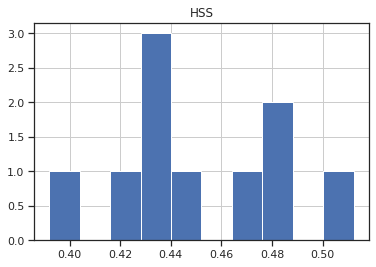

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_plus = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_plus.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_plus[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_plus,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_plus)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_plus,columns=["HSS"]).hist();
     

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the mean of the distribution underlying the sample without time variables is less than the mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [33]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_t, HSS_plus, alternative="less")

print("\nHSS LGBMClassifier:", np.round(HSS_t,2))
print("\nHSS ExtraTreesClassifier:", np.round(HSS_plus,2))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HHS mean ExtraTreesClassifier = HSS mean with LGBMClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample LGBMClassifier is less than the HSS mean of the sample with ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean LGBMClassifier = HSS mean with ExtraTreesClassifier")


HSS LGBMClassifier: [0.36 0.41 0.45 0.42 0.4  0.42 0.42 0.44 0.42 0.45]

HSS ExtraTreesClassifier: [0.43 0.39 0.47 0.48 0.48 0.42 0.44 0.44 0.44 0.51]

alpha:  0.01

p_value point:  0.010603779505908337

we are accepting null hypothesis:  H0: HSS mean LGBMClassifier = HSS mean with ExtraTreesClassifier
